### 04. Model Training

#### 4.1 Linear Regression

In [1]:
# 무작위 선형 데이터셋 생성
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # = 가우시안 잡음(noise)

# 정규방정식을 사용한 theta hat 계산, inv() = 역행렬 계산, dot() = 행렬 곱
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x_0 = 1 을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best
# array ([[4.21], [2.77]])

array([[4.26765121],
       [2.84771971]])

In [2]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict
# array([[4.21], [9.76]])

array([[4.26765121],
       [9.96309063]])

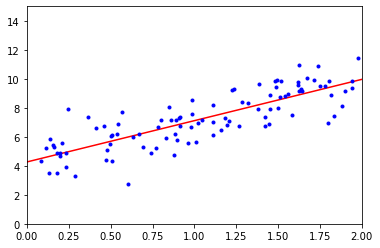

In [3]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
# 사이킷런을 활용한 예측
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
# array([4.21]), array([[2.77]])

(array([4.26765121]), array([[2.84771971]]))

In [5]:
lin_reg.predict(X_new)
# array([[4.21], [9.76]])

array([[4.26765121],
       [9.96309063]])

In [6]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.26765121],
       [2.84771971]])

In [7]:
# 유사역행렬
np.linalg.pinv(X_b).dot(y)
# array([[4.215], [2.770]])

array([[4.26765121],
       [2.84771971]])

#### 4.2 Gradient Descent

In [8]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.26765121],
       [2.84771971]])